# Surface module Example

The QuantForm library implements classes for various surfaces. The classes generally accept some set of points (or a way to calculate the set of points) as parameters and interpolates the full surface from them. 

In [1]:
# Setup for the notebook
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from quantform.pylib.surface import GenericSurface
GenericSurface

quantform.pylib.surface.GenericSurface.GenericSurface

## GenericSurface

The simplest surface implementation is the GenericSurface class. This class takes as parameter the points as an array of tuples and the values and uses a CloughTocher2DInterpolator interpolator to form a continuous surface. For example

In [2]:
def func(xy):
  return np.exp(np.sin(xy[:, 0] * np.pi) * np.cos(xy[:, 1]))

x = np.linspace(1, 2, 10)
y = np.linspace(1, 2, 10)

xy = np.array(list(product(x, y)))

z = func(xy)

surf = GenericSurface(xy, z)

The interpolated points can be accessed by calling the surface object

In [3]:
print(f"Interpolated at (1.22, 1.73): {surf((1.22, 1.73))}")
print(f"Should be: {func(np.array([[1.22, 1.73]]))[0]}")

Interpolated at (1.22, 1.73): 1.1059082191116312
Should be: 1.1063342806689815


Unlike with the curves the surfaces cannot be extrapolated

In [4]:
try:
  surf((2.7, 3.))
except AssertionError as e:
  print(e)

Given point is out of range! ((2.7, 3.0) not in range from [1. 1.] to [2. 2.])


The full surface can easily be visualised

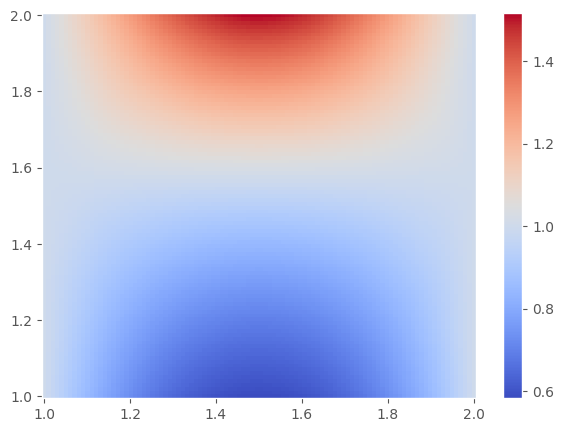

In [5]:
fig = surf.plot((100, 100), ((1., 2.), (1., 2.)))
plt.show()

Or alternatively as a 3D plot

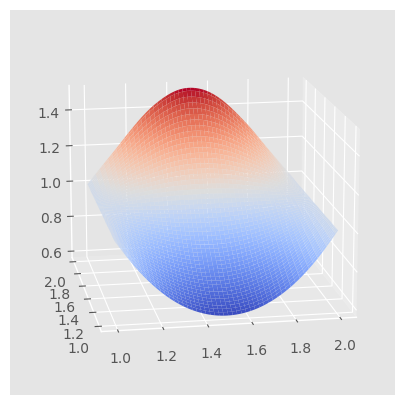

In [6]:
fig = surf.plot((100, 100), ((1., 2.), (1., 2.)), plot_heatmap=False)
plt.show()

The surface object can also be used with noisy data. However, the interpolator alone would be quite prone to overfitting in such cases. Instead, a Gaussian filter can first be applied to the points and the interpolator fitted to the filtered values

100


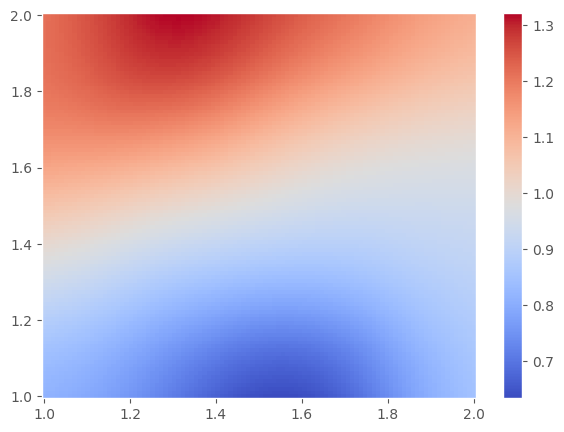

In [7]:
z_noisy = z + np.random.normal(0, 0.5, 100)

surf_filtered = GenericSurface(xy, z_noisy, apply_gaussian_filter=True, gaussian_filter_sd=2)
fig = surf_filtered.plot((100, 100), ((1., 2.), (1., 2.)))
plt.show()

Without the filter the result is far less usable

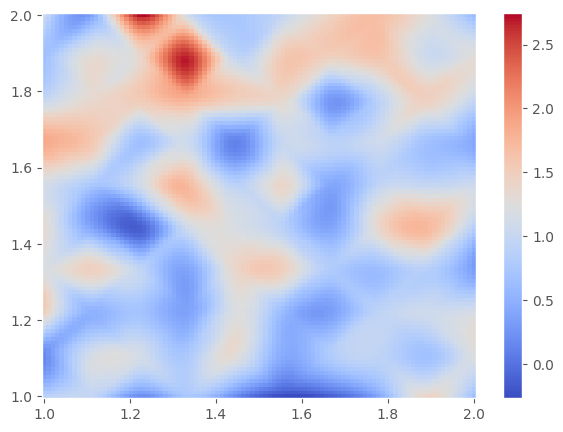

In [8]:
surf_noisy = GenericSurface(xy, z_noisy)
fig = surf_noisy.plot((100, 100), ((1., 2.), (1., 2.)))
plt.show()